# Employee attrition data set : Eda and DecisionTree Model Predictions

In [1]:
#importing modules for data cleaning and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

### Data Cleaning 

In [2]:
##Loading data set to pandas frame 
df= pd.read_csv('HR_Employee_Attrition_Data.csv')

In [3]:
## getting a sense of columns and type of data it holds
import warnings ##To suppress warning 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100) # to avoid trunc data in data frame 
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
#Data seems to have categorical and continues values checking for data types of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
# exploring the target variable
print("Target columns has ",df.Attrition.unique()," values")
print(df.Attrition.value_counts())
print("proportion of Target columns is imbalanced")

Target columns has  ['Yes' 'No']  values
No     2466
Yes     474
Name: Attrition, dtype: int64
proportion of Target columns is imbalanced


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# exploring which columns can be classified has categorical 
df.Education.value_counts()
#some columns have already been discretised with dummy values as an example below 

3    1144
4     796
2     564
1     340
5      96
Name: Education, dtype: int64

In [8]:
# Writing small script to identify the columns which have strings for classifying them to categorical data 
str_cols=[]
for i in range(35):
    if isinstance(df.iloc[0,i],str):
        str_cols.append(df.columns.to_list()[i])
    else:
        pass
print("columns with strings categorical values ",str_cols)
##checking against the columns 
df.head(3)
##The identified columns to be used for one-hot coding / pandas dummy methods for mapping categorical values to numricals
## incase we decide to go with lienar modesl else they can stay put as they are NOTE the conversion does not transform the 
##the data just encodes the data into numercial format for model to handle

columns with strings categorical values  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [9]:
### how many unique values do each columns holds
for cols in df.columns.to_list():
    #if df[cols].dtypes== 'object':
    unique = len(df[cols].unique())
    print("Feature '{}' has {} unique categories".format(cols,unique))

Feature 'Age' has 43 unique categories
Feature 'Attrition' has 2 unique categories
Feature 'BusinessTravel' has 3 unique categories
Feature 'DailyRate' has 886 unique categories
Feature 'Department' has 3 unique categories
Feature 'DistanceFromHome' has 29 unique categories
Feature 'Education' has 5 unique categories
Feature 'EducationField' has 6 unique categories
Feature 'EmployeeCount' has 1 unique categories
Feature 'EmployeeNumber' has 2940 unique categories
Feature 'EnvironmentSatisfaction' has 4 unique categories
Feature 'Gender' has 2 unique categories
Feature 'HourlyRate' has 71 unique categories
Feature 'JobInvolvement' has 4 unique categories
Feature 'JobLevel' has 5 unique categories
Feature 'JobRole' has 9 unique categories
Feature 'JobSatisfaction' has 4 unique categories
Feature 'MaritalStatus' has 3 unique categories
Feature 'MonthlyIncome' has 1349 unique categories
Feature 'MonthlyRate' has 1427 unique categories
Feature 'NumCompaniesWorked' has 10 unique categories
F

In [11]:
##Clearly from above we have "Over 18", "Employee Number"-> almost the length of data frame,"employee count" , 
##"Over18",'StandardHours' eitr unique value is 1 upon closer observation these cols do not add any value to analysis
## hence dropping them in X Data Frame
drop_cols = [x for x in df.columns.to_list() if (len(df[x].unique())<=1 or len(df[x].unique())==len(df)) ]
X = df.drop(columns=drop_cols)
X

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [12]:
##checking for null values. 
np.array((X.isnull().sum()))
## data does not seem to have any null values luckily cleaned set of data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Data Visualisation 

###### Categorical features visualisation 

In [13]:
# data preparation 
below_five = []
#above_five_ = []
for cols in df.columns.to_list():
    #if df[cols].dtypes== 'object':
    unique = len(df[cols].unique())
    if 1 < unique <=5:
        below_five.append(cols)
        print("Feature '{}' has {} unique categories".format(cols,unique))
reshape_five = np.array(below_five).reshape(5,3)


Feature 'Attrition' has 2 unique categories
Feature 'BusinessTravel' has 3 unique categories
Feature 'Department' has 3 unique categories
Feature 'Education' has 5 unique categories
Feature 'EnvironmentSatisfaction' has 4 unique categories
Feature 'Gender' has 2 unique categories
Feature 'JobInvolvement' has 4 unique categories
Feature 'JobLevel' has 5 unique categories
Feature 'JobSatisfaction' has 4 unique categories
Feature 'MaritalStatus' has 3 unique categories
Feature 'OverTime' has 2 unique categories
Feature 'PerformanceRating' has 2 unique categories
Feature 'RelationshipSatisfaction' has 4 unique categories
Feature 'StockOptionLevel' has 4 unique categories
Feature 'WorkLifeBalance' has 4 unique categories


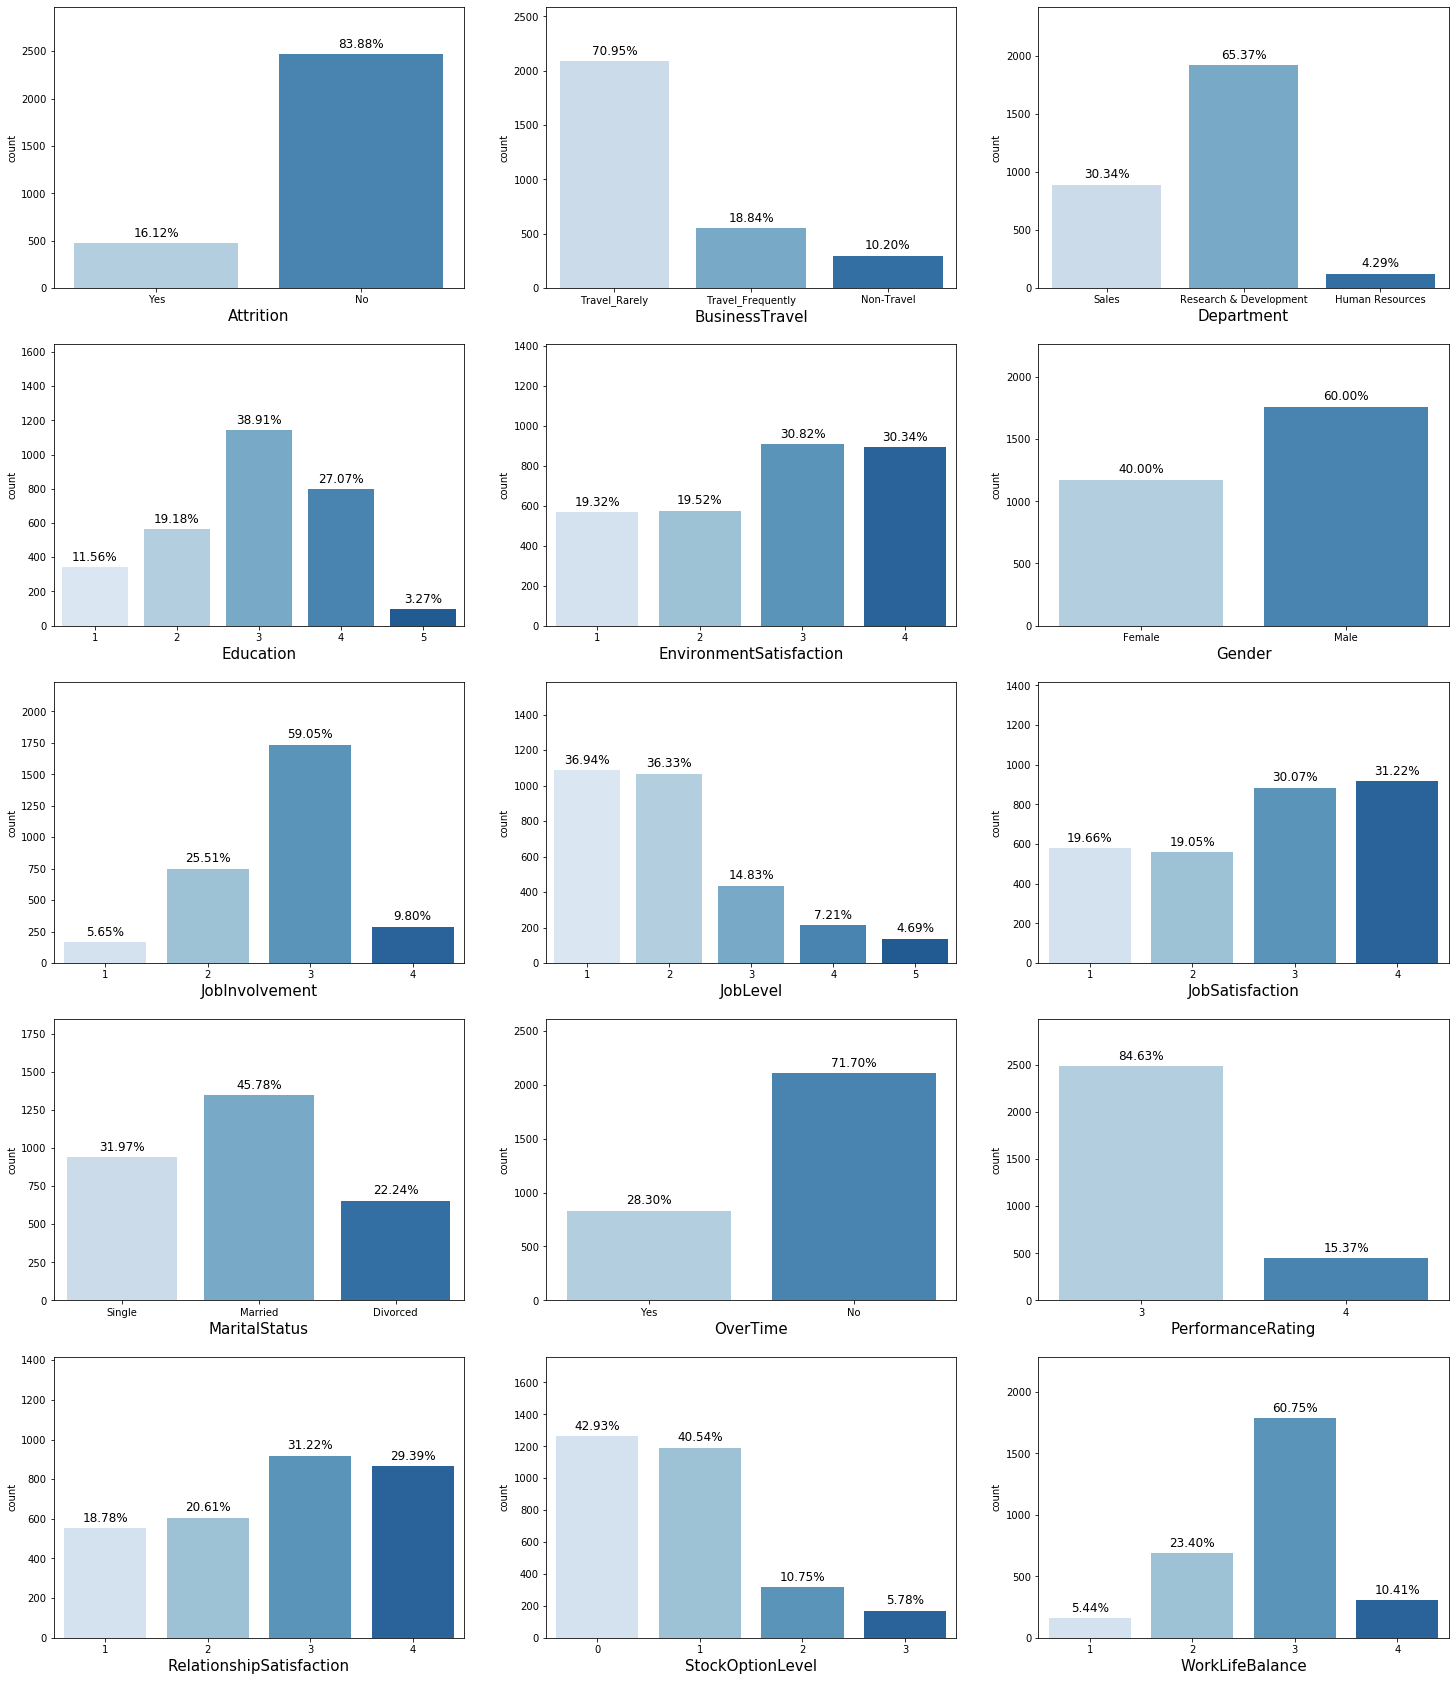

In [14]:
fig,axes = plt.subplots(5,3,figsize=(25,30))
for i in range(5):
    for j in range(3):
            #sns.countplot(df[sns_cols[i][j]],hue=df['Attrition'],ax=axes[i,j])
        axes[i][j].set_xlabel(reshape_five[i][j],fontsize=15)
        axes[i][j].set_ylabel("Attrition Count")
        axes[i][j].set_ylim(0,max(df[reshape_five[i][j]].value_counts())+500)
        p = sns.countplot(df[reshape_five[i][j]],ax=axes[i,j],palette="Blues")
        for x in p.patches:
            p.annotate(str(format(x.get_height()/len(df)*100,'.2f'))+"%",(x.get_x()+x.get_width() / 2.,x.get_height()),
                           ha='center',va='center',xytext=(0,10),textcoords='offset points',fontsize=12,fontweight='normal')
    
plt.show()  
#Visual identify the distribution of each categorical features distribution in percentage

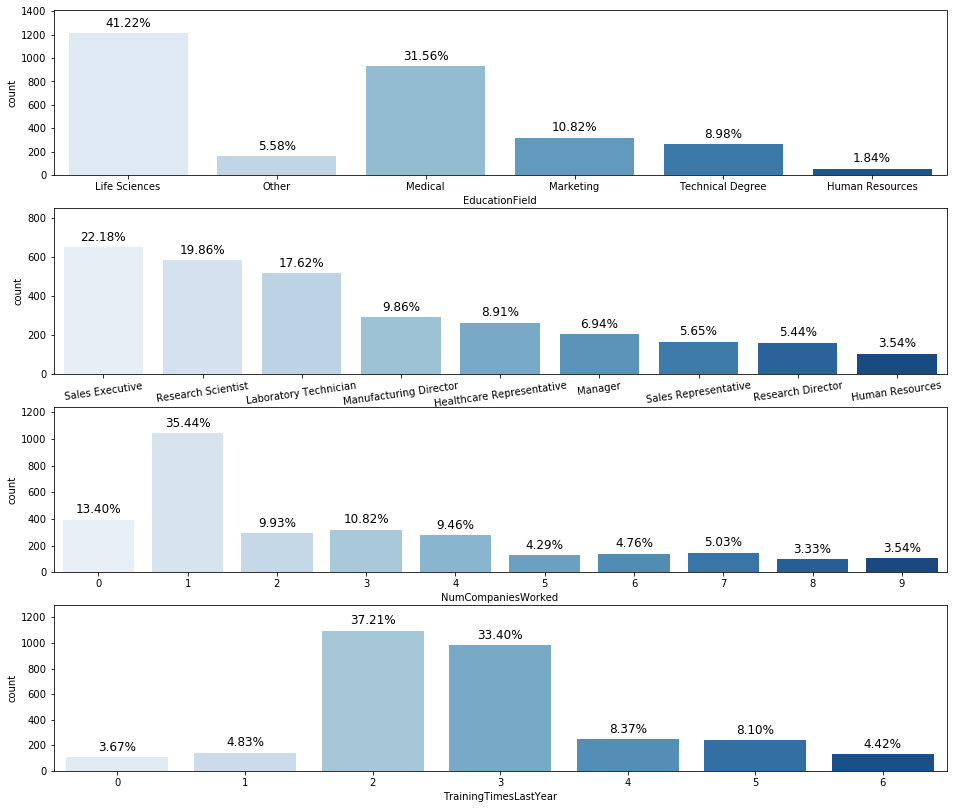

In [15]:
## Visualising Feature with caategories more then 5 
above5_ = [x for x in list(df.columns) if (len(df[x].unique()) > 5 and len(df[x].unique())<=10) ]
above5_

fig,axes = plt.subplots(4,1,figsize=(16,14))

for i in range(len(above5_)):
    axes[i].set_ylim(0,max(df[above5_[i]].value_counts())+200)
    if above5_[i]=='JobRole':
        plt.setp(axes[i].get_xticklabels(),rotation=8)
    p = sns.countplot(df[above5_[i]],ax=axes[i],palette="Blues")
    for x in p.patches:
                p.annotate(str(format(x.get_height()/len(df)*100,'.2f'))+"%",(x.get_x()+x.get_width() / 2.,x.get_height()),
                           ha='center',va='center',xytext=(0,10),textcoords='offset points',fontsize=12,fontweight='normal')
plt.show()

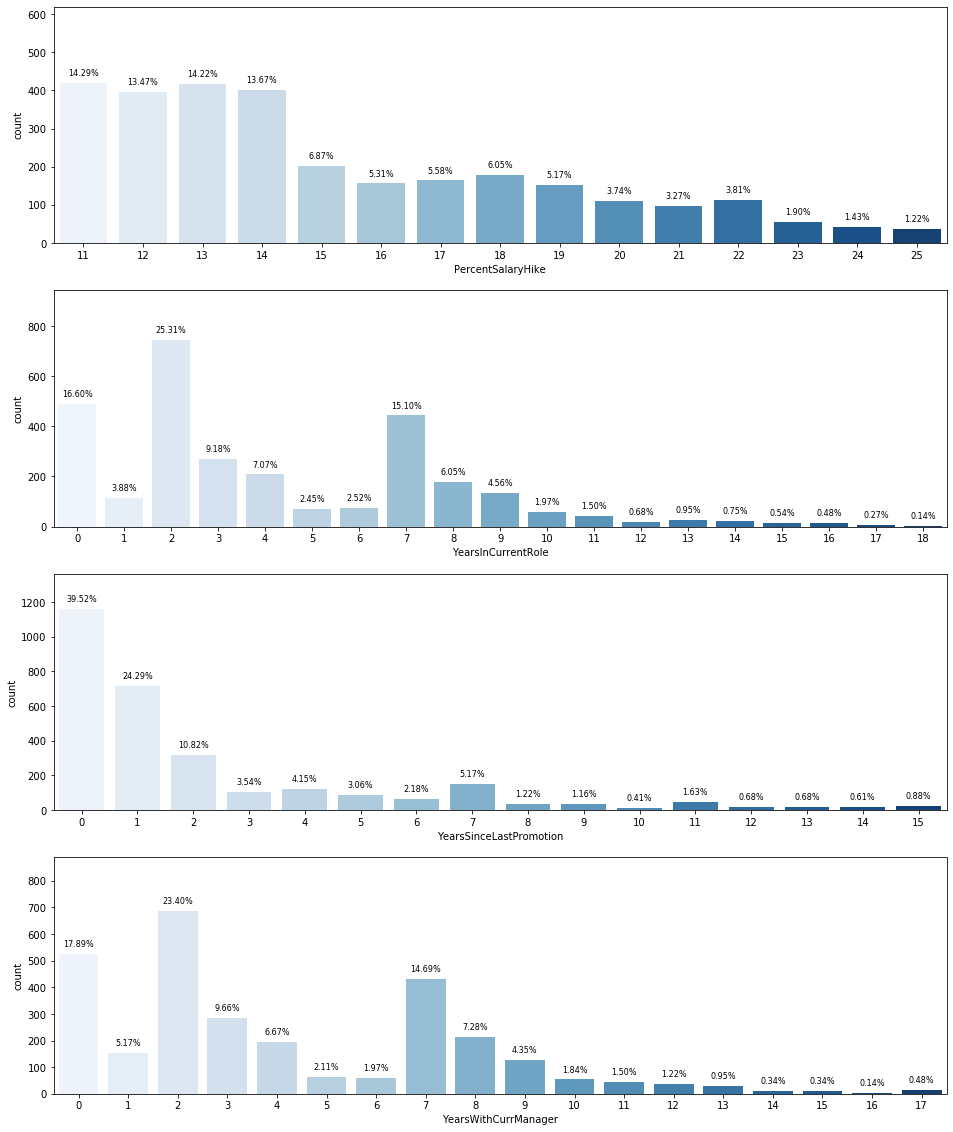

In [16]:
above10_ = [x for x in list(df.columns) if (len(df[x].unique()) > 10 and len(df[x].unique())<=20) ]
above10_
fig,axes = plt.subplots(4,1,figsize=(16,20))

for i in range(len(above10_)):
    axes[i].set_ylim(0,max(df[above10_[i]].value_counts())+200)
    #if plot_two.index[i]=='JobRole':
       # plt.setp(axes[i].get_xticklabels(),rotation=8)
    p = sns.countplot(df[above10_[i]],ax=axes[i],palette="Blues")
    for x in p.patches:
                p.annotate(str(format(x.get_height()/len(df)*100,'.2f'))+"%",(x.get_x()+x.get_width() / 2.,x.get_height()),
                           ha='center',va='center',xytext=(0,10),textcoords='offset points',fontsize=8,fontweight='normal')
plt.show()

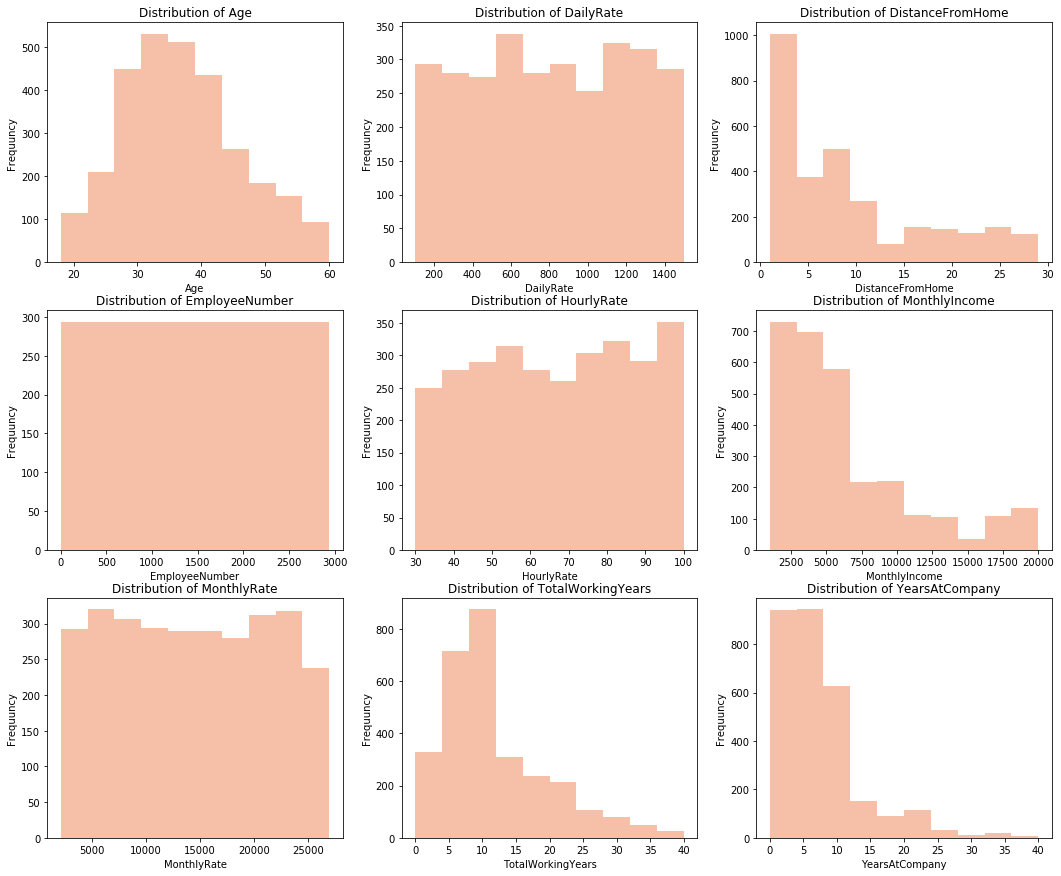

In [17]:
import matplotlib.gridspec as gridspec

above20_ = [x for x in list(df.columns) if (len(df[x].unique()) > 20 ) ]
above20_ = np.array(above20_).reshape(3,3)
above20_

fig2 = plt.figure(figsize=(18,15),constrained_layout=False)
spec2 = gridspec.GridSpec(ncols=3, nrows=3, figure=fig2)
for i in range(3):
    for j in range(3):
        fig2.add_subplot(spec2[i,j]).hist(df[above20_[i][j]],color="#ea6227",alpha=0.4)
        fig2.add_subplot(spec2[i,j]).set_title("Distribution of {}".format(above20_[i][j]))
        fig2.add_subplot(spec2[i,j]).set_xlabel("{}".format(above20_[i][j]))
        fig2.add_subplot(spec2[i,j]).set_ylabel("Frequuncy")

###### Age data seems to follow normal distribution

###### Outlier detection in  features with continous variables

In [18]:
#visualising outliers in continous varialble 
for cols in X.columns.to_list():
    #if df[cols].dtypes== 'object':
    unique = len(X[cols].unique())
    condition = (unique >=30)
    if condition == True:
        print("Feature '{}' has {} unique categories".format(cols,unique))

Feature 'Age' has 43 unique categories
Feature 'DailyRate' has 886 unique categories
Feature 'HourlyRate' has 71 unique categories
Feature 'MonthlyIncome' has 1349 unique categories
Feature 'MonthlyRate' has 1427 unique categories
Feature 'TotalWorkingYears' has 40 unique categories
Feature 'YearsAtCompany' has 37 unique categories


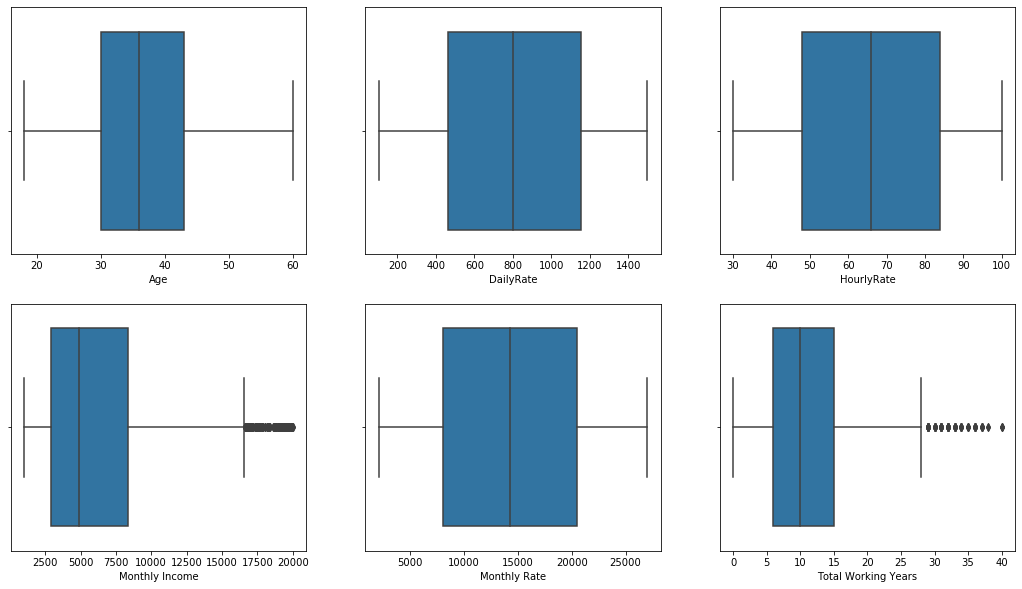

In [19]:
fig,axes = plt.subplots(2,3,figsize=(18,10))
sns.boxplot(['Age'],data=X,orient="h",ax=axes[0,0])
axes[0,0].set_xlabel("Age")
sns.boxplot(['DailyRate'],data=X,orient="h",ax=axes[0,1])
axes[0,1].set_xlabel("DailyRate")
sns.boxplot(['HourlyRate'],data=X,orient="h",ax=axes[0,2])
axes[0,2].set_xlabel("HourlyRate")
sns.boxplot(['MonthlyIncome'],data=X,orient="h",ax=axes[1,0])
axes[1,0].set_xlabel("Monthly Income")
sns.boxplot(['MonthlyRate'],data=X,orient="h",ax=axes[1,1])
axes[1,1].set_xlabel("Monthly Rate")
sns.boxplot(['TotalWorkingYears'],data=X,orient="h",ax=axes[1,2])
axes[1,2].set_xlabel("Total Working Years")
plt.show()

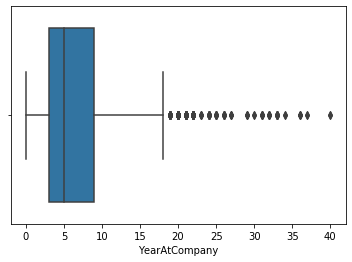

In [20]:
sns.boxplot(X['YearsAtCompany'])
plt.xlabel('YearAtCompany')
plt.show()

###### Monthly income , YearsAtCompany and TotalWorkingYears seems to have outliers

In [21]:
# function to get outliers Using Tukey Quartile
def find_outliers_tukey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    floor = q1 - 1.5 * iqr
    ceiling = q3 + 1.5 * iqr
    outlier_indices =list(x.index[(x<floor) | (x>ceiling)])
    outlier_values = list(x[(x<floor) | (x > ceiling)])
    
    return outlier_indices,outlier_values

In [22]:
"""Age' has 43 unique categories
Feature 'DailyRate' has 886 unique categories
Feature 'HourlyRate' has 71 unique categories
Feature 'MonthlyIncome' has 1349 unique categories
Feature 'MonthlyRate' has 1427 unique categories
Feature 'TotalWorkingYears' has 40 unique categories
Feature 'YearsAtCompany' has 37 unique categories
"""
outlier_ind_MonthlyIncome,outlier_val_MonthlyIncome = find_outliers_tukey(X['MonthlyIncome'])
outlier_ind_TotalWorkingYears,outlier_val_TotalWorkingYears = find_outliers_tukey(X['TotalWorkingYears'])
outlier_ind_YearsAtCompany,outlier_val_YearsAtCompany = find_outliers_tukey(X['YearsAtCompany'])


In [23]:
print("Montly Income Outliers")
print(outlier_val_MonthlyIncome)

Montly Income Outliers
[19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880, 19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 170

In [24]:
print(" Total Working Years - Numbers: {} and total count {} ".format(set(outlier_val_TotalWorkingYears),
                                                                      len(outlier_val_TotalWorkingYears)))
print(outlier_val_TotalWorkingYears)

 Total Working Years - Numbers: {32, 33, 34, 35, 36, 37, 38, 40, 29, 30, 31} and total count 126 
[31, 29, 37, 38, 30, 40, 36, 34, 32, 33, 37, 30, 36, 31, 33, 32, 37, 31, 32, 32, 30, 34, 30, 40, 29, 35, 31, 33, 31, 29, 32, 30, 33, 30, 29, 31, 32, 33, 36, 34, 31, 36, 33, 31, 29, 33, 29, 32, 31, 35, 29, 32, 34, 36, 32, 30, 36, 29, 34, 37, 29, 29, 35, 31, 29, 37, 38, 30, 40, 36, 34, 32, 33, 37, 30, 36, 31, 33, 32, 37, 31, 32, 32, 30, 34, 30, 40, 29, 35, 31, 33, 31, 29, 32, 30, 33, 30, 29, 31, 32, 33, 36, 34, 31, 36, 33, 31, 29, 33, 29, 32, 31, 35, 29, 32, 34, 36, 32, 30, 36, 29, 34, 37, 29, 29, 35]


In [25]:
print(" Years in Company - Numbers : {} and total count {}".format(set(outlier_val_YearsAtCompany),
                                                                   len(outlier_val_YearsAtCompany)))
print(outlier_val_YearsAtCompany)

 Years in Company - Numbers : {32, 33, 34, 36, 37, 40, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31} and total count 208
[25, 22, 22, 27, 21, 22, 37, 25, 20, 40, 20, 24, 20, 24, 33, 20, 19, 22, 33, 24, 19, 21, 20, 36, 20, 20, 22, 24, 21, 21, 25, 21, 29, 20, 27, 20, 31, 32, 20, 20, 21, 22, 22, 34, 24, 26, 31, 20, 31, 26, 19, 21, 21, 32, 21, 19, 20, 22, 20, 21, 26, 20, 22, 24, 33, 29, 25, 21, 19, 19, 20, 19, 33, 19, 19, 20, 20, 20, 20, 20, 32, 20, 21, 33, 36, 26, 30, 22, 23, 23, 21, 21, 22, 22, 19, 22, 19, 22, 20, 20, 20, 22, 20, 20, 25, 22, 22, 27, 21, 22, 37, 25, 20, 40, 20, 24, 20, 24, 33, 20, 19, 22, 33, 24, 19, 21, 20, 36, 20, 20, 22, 24, 21, 21, 25, 21, 29, 20, 27, 20, 31, 32, 20, 20, 21, 22, 22, 34, 24, 26, 31, 20, 31, 26, 19, 21, 21, 32, 21, 19, 20, 22, 20, 21, 26, 20, 22, 24, 33, 29, 25, 21, 19, 19, 20, 19, 33, 19, 19, 20, 20, 20, 20, 20, 32, 20, 21, 33, 36, 26, 30, 22, 23, 23, 21, 21, 22, 22, 19, 22, 19, 22, 20, 20, 20, 22, 20, 20]


###### Examining each feature with respect to attrition 

In [26]:
## function to plot histograms
colors = ["#ea6227","#f2a51a","#543864","#8ac6d1","#ff6363","#6983aa","#efa8e4","#f8e1f4","#fff0f5"]

def plot_histogram(x,color,bins=10):
    plt.hist(x,color=color,bins=bins)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(" Histogram of {}".format(x.name))
    
def plot_histogram_dv(x,y,val,alpha,label=None):
    plt.hist(x,color="#8ac6d1",label=x.name)
    plt.hist(x[y==val[0]],color="#f2a51a",alpha=alpha,label=val[0])
    plt.hist(x[y==val[1]],color="#efa8e4",alpha=alpha,label=val[1])
    plt.legend(loc='upper right',edgecolor="inherit")

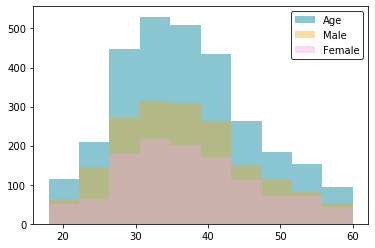

In [27]:
plot_histogram_dv(X['Age'],X['Gender'],val=['Male','Female'],label="so",alpha=0.4)

###### Number of Males Employees have higher distribution age wise 

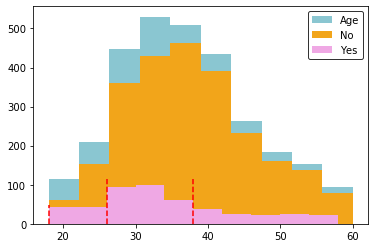

In [28]:
##Age vs Attrition rate 
plot_histogram_dv(X['Age'],X['Attrition'],val=['No','Yes'],label="so",alpha=1)
plt.plot([26,26],[0,115],linestyle='dashed',color='red')
plt.plot([38,38],[0,115],linestyle='dashed',color='red')
plt.plot([18,18],[0,48],linestyle='dashed',color='red')
plt.show()

#### Attrition among age group of 18-42 is higher than 42-60 , Highlighed in red dashed line 26-38 age group is more susceptible to leave the company however considering the non attrition age group 18-26 can have higher chances of leaving the company when looking at the frequency plot

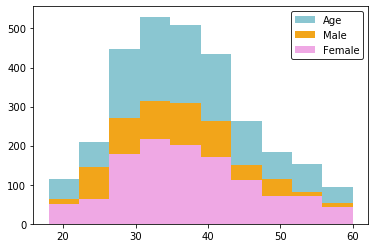

In [29]:
## Attrition among male employess vs female employess 
x = X[X['Attrition']=="Yes"] ## Data frame of attritioned employess
plot_histogram_dv(X['Age'],X['Gender'],val=['Male','Female'],label="so",alpha=1)

#### As shown above Male employees have higher chances of being susceptible to attrition However there may be bias as the male to female ratio in data set was not equal hence we cannot conclude which group of employess if based on gender are more susceptable to leave the company

#### which departments do overall susceptible age group  Work for ??

In [30]:
department_age = X[(X['Age']>=26) & (X['Age']<=38)]

#plot_histogram_dv(da,X['Gender'],val=['Male','Female'],label="so",alpha=1)
def plot_histogram_dv3(x,y,val,alpha,label=None):
    plt.hist(x,color="#8ac6d1",label=x.name)
    plt.hist(x[y==val[0]],color="#f2a51a",alpha=alpha,label=val[0])
    plt.hist(x[y==val[1]],color="#efa8e4",alpha=alpha,label=val[1])
    plt.hist(x[y==val[2]],color="#543864",alpha=alpha,label=val[2])
    plt.legend(loc='best',edgecolor="inherit")

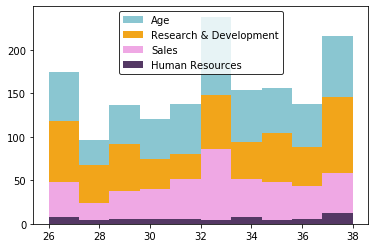

In [31]:
plot_histogram_dv3(department_age['Age'],department_age['Department'],['Research & Development','Sales',
                                                                       'Human Resources'],alpha=1,label='so')

###### Research and development department has more number of employees compared to other departments - (Ther may be bias as the employee count in Reasearch and development in data set is higher as shown below )


###### There seems to be unusual spread of employees ,26-38 age group dominate the employee count above 50%+ percentage in all departments

In [32]:
## Numerical verification of the above finding
x_ = department_age.Department.value_counts()
da_ = X.Department.value_counts()

for k,v in x_.items():
    print("{} department has {}% who belong to age group of 26-38 ".format(k,round((x_[k]/da_[k]) *100 ),4))

Research & Development department has 53.0% who belong to age group of 26-38 
Sales department has 55.0% who belong to age group of 26-38 
Human Resources department has 51.0% who belong to age group of 26-38 


#### what is the average earning potention of these age group ????

Average earning potention of 26-38 age group :5079.27
Checking for outlier in the group


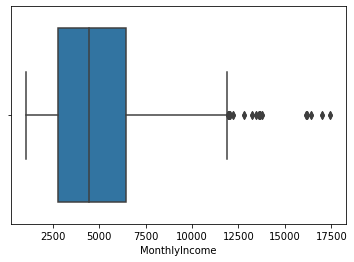

In [33]:
print("Average earning potention of 26-38 age group :{}".format(round(department_age['MonthlyIncome'].mean(),2)))
print("Checking for outlier in the group")
sns.boxplot(department_age['MonthlyIncome'])
plt.show()

In [34]:
de_outlier_indices,de_outlier_vals =find_outliers_tukey(department_age['MonthlyIncome'])
print("List of Monthly Income outliers in selected age group ",de_outlier_vals)

List of Monthly Income outliers in selected age group  [11994, 13458, 13664, 12185, 13675, 13603, 11996, 12061, 11935, 13610, 16184, 12808, 13582, 17444, 16124, 11916, 16422, 17007, 13206, 13744, 11994, 13458, 13664, 12185, 13675, 13603, 11996, 12061, 11935, 13610, 16184, 12808, 13582, 17444, 16124, 11916, 16422, 17007, 13206, 13744]


###### Which departments do outliers belong to ?

In [35]:
de_outlier_indices
empty = [ X.iloc[x,4] for x in de_outlier_indices ]
outlier_department_count = { x:empty.count(x) for x in set(empty)}
print("Departments of outlier ",outlier_department_count)

## what positions do these outliers hold in company
positions = [ X.iloc[x,13] for x in de_outlier_indices]
print("Job Role of outlier positions ",np.unique(positions))

Departments of outlier  {'Research & Development': 38, 'Sales': 2}
Job Role of outlier positions  ['Manager' 'Research Director']


###### Average earning potention of susceptible age group after removing outliers

In [36]:
average_earning = X.drop(index=de_outlier_indices)
print("Average earning potential after removing outliers ",round(average_earning['MonthlyIncome'].mean(),2))

Average earning potential after removing outliers  6401.86


###### Significant increase in monthly earning potential after removal of outliers from 5079 to 6401

In [37]:
#attrition count above average monthly earning potential
print("Attrition count below average earning potential ",
      department_age[(department_age['Attrition']=="Yes") & (department_age['MonthlyIncome']<6402)]['Age'].count())
print("Attrition count above average earning potential ",
      department_age[(department_age['Attrition']=="Yes") & (department_age['MonthlyIncome']>6402)]['Age'].count())

Attrition count below average earning potential  214
Attrition count above average earning potential  46


###### Indicates that the majority in age group of 26-38 who left were earning below  average earning potential 

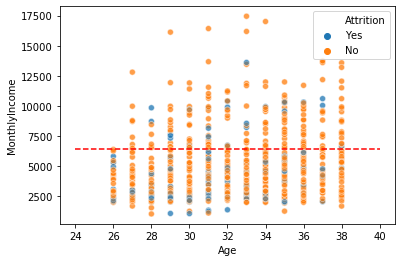

In [38]:
#scatter plot visualisation of Age vs Monthly Income of age group 26 - 38
sns.scatterplot(y=department_age['MonthlyIncome'],x=department_age['Age'],data=X,hue=X['Attrition'],alpha=0.5)
plt.plot([24,40],[6401,6401],linestyle='dashed',color='red') #Not a regression line just a average earning 
#line separating data points
plt.show()

##### How is the Environment Satisfaction for the susceptible age group ?

In [39]:
department_age.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0


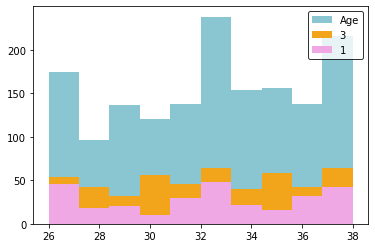

In [43]:
## Environment satisfaction rating or 3 & 1 
plot_histogram_dv(department_age['Age'],department_age['EnvironmentSatisfaction'],[3,1],alpha=1,label=None)

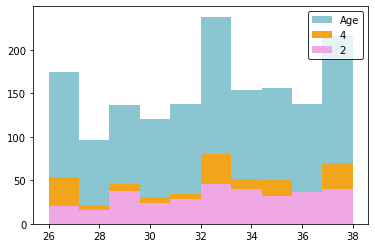

In [40]:
plot_histogram_dv(department_age['Age'],department_age['EnvironmentSatisfaction'],[4,2],alpha=1,label=None)

In [96]:
for i in range(1,5):
    
    rate =len(department_age[(department_age['Attrition']=="Yes") & 
                       (department_age['EnvironmentSatisfaction']==i)])/len(department_age[department_age['Attrition']==
                                                                                           "Yes"])
    print("Environment satisfaction == {} of susceptible Age Group :{}".format(i,rate*100))

Environment satisfaction == 1 of susceptible Age Group :31.538461538461537
Environment satisfaction == 2 of susceptible Age Group :19.230769230769234
Environment satisfaction == 3 of susceptible Age Group :25.384615384615383
Environment satisfaction == 4 of susceptible Age Group :23.846153846153847


######                 Environment satisfaction does not indicate any significance 

In [42]:
#Finding the proportion of susceptible age group 22-42 in features

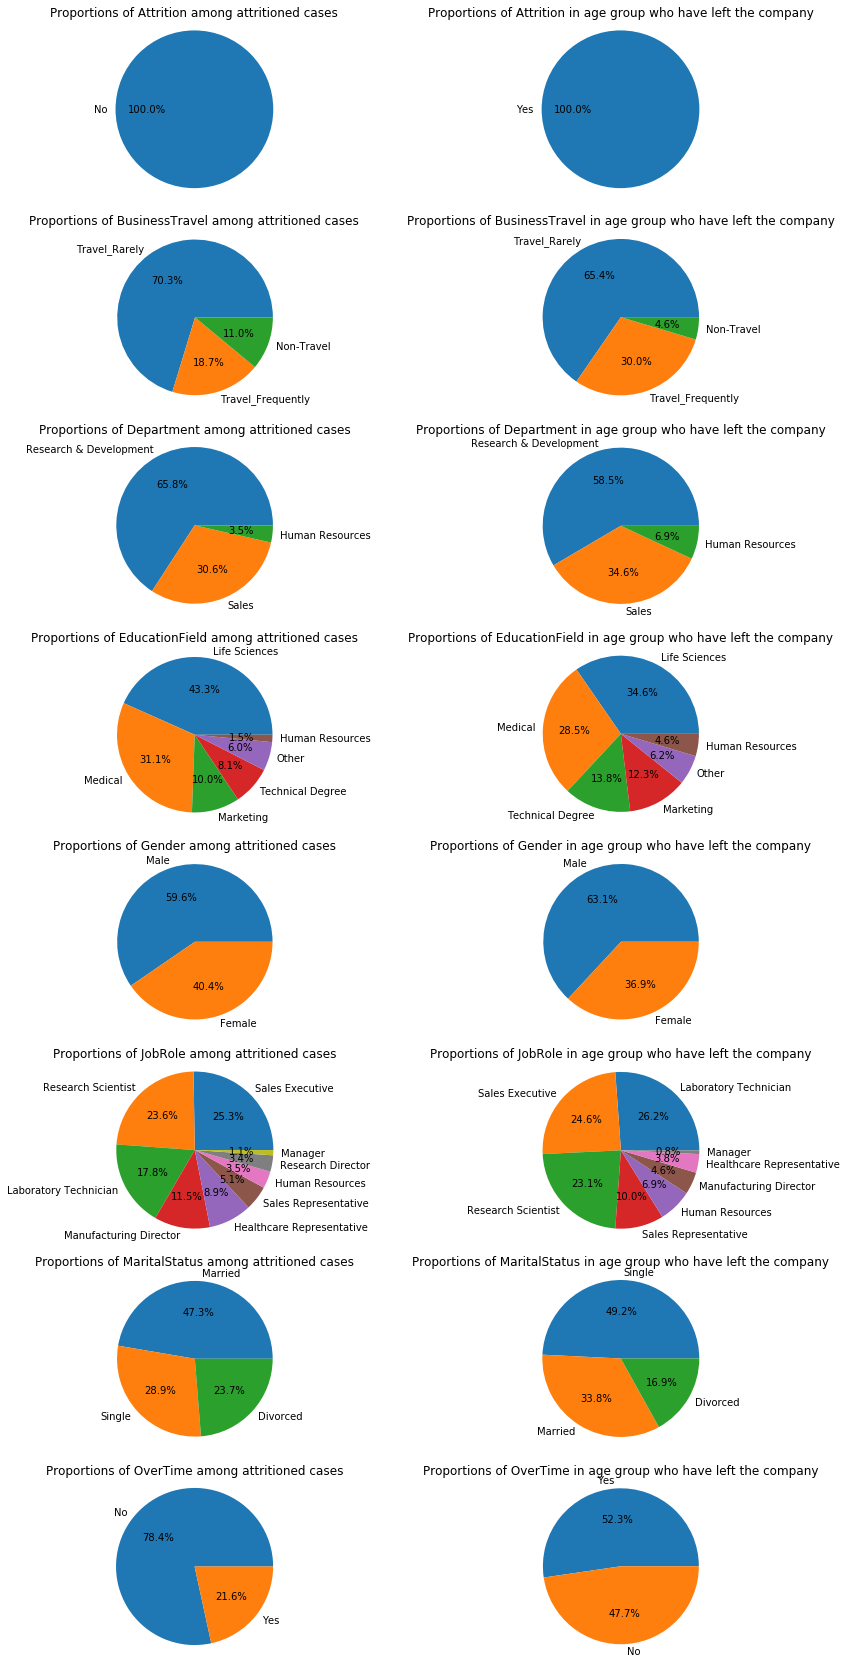

In [43]:
age_cols=[]
for i in range(len(list(department_age.columns))):
    if isinstance(department_age.iloc[0,i],str):
        age_cols.append(department_age.columns.to_list()[i])
    else:
        pass
main_frame =department_age[department_age['Attrition']=="No"]
age_frame  = department_age[department_age['Attrition']=="Yes"]

_3by3Mat =age_cols
fig3 = plt.figure(figsize=(14,30),constrained_layout=False)
spec3 = gridspec.GridSpec(ncols=2,nrows=8,figure=fig3)

for i in range(8):
    z =main_frame[_3by3Mat[i]].value_counts().to_dict()
    labels = list(z.keys())
    vals = list(z.values())
    fig3.add_subplot(spec3[i,0]).pie(vals,labels=labels,autopct='%1.1f%%')
    fig3.add_subplot(spec3[i,0]).axis('equal')
    fig3.add_subplot(spec3[i,0]).set_title("Proportions of {} among attritioned cases".format(_3by3Mat[i]))
    
for i in range(8):
    z = age_frame[_3by3Mat[i]].value_counts().to_dict()
    labels = list(z.keys())
    vals = list(z.values())
    fig3.add_subplot(spec3[i,1]).pie(vals,labels=labels,autopct='%1.1f%%')
    fig3.add_subplot(spec3[i,1]).axis('equal')
    fig3.add_subplot(spec3[i,1]).set_title("Proportions of {} in age group who have left the company".format(_3by3Mat[i]))
    

###### There seems to be very little effect of features on attritions that is not related to monetary 

#### Conclusion of EDA, was able to narrow down the age_group and as per data main reason for attrition among this group is tied with Potential Earning capacity so far ..

#### Finding Machine learning models to fit the data for predictions : 
    
    Choosing classification models : Logistic Regression, Decision Tree, Support vector machines will do a good job 
    Since Target has disproportionate outcomes, stratified sampling may help build better models
    

###### Preprocessing Data : Cleaning and dropping the columns that do not add any value

In [44]:
## Small function to identify categorical Features and encode them to 0's and 1's 
def preprocess(df):
    ret_df = df.copy()
    ret_cols = ret_df.columns
    le = LabelEncoder()
    cat = [ x for x in ret_cols if isinstance(ret_df.loc[0,x],str) ]
    for i in cat:
        ret_df[i] = le.fit_transform(ret_df[i])
    return ret_df

In [45]:
encoded_frame = preprocess(df)
encoded_frame.head(5)
# For Attrition - target column 0 = No, 1 = Yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,3,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,5,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [50]:
#Separting Target ('Attrition') and removing features which do not add any value 
#'Over18' : not needed since all the employees are above 18
#'Attrition': Target will be stored in another series
#'EmployeeNumber',: just an identification value which does not add any value to modelling
#'StandardHours',: its more or less the same for all employees
#'EmployeeCount' : same values through out the data
x_encd = encoded_frame.drop(columns=['Over18','Attrition','EmployeeNumber','StandardHours','EmployeeCount'])
y_encd = encoded_frame['Attrition']

# Examining x_encd and y_encd 
x_encd.head(2) #y_encd.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7


In [51]:
y_encd.head(2)

0    1
1    0
Name: Attrition, dtype: int32

In [54]:
x_encd.isnull().sum().max(),y_encd.isnull().sum().max()
# There are no null values

(0, 0)

###### Splitting data for  training and testing with 70:30 and maintaining the proportions 

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x_encd,y_encd,test_size=0.3,stratify=y_encd,random_state=40)

In [70]:
#Observing split data set
x_train.index,x_test.index,y_train.index,y_test.index
#sampling looks good 

(Int64Index([ 467, 1596, 2934,  963,  457, 1359,  745, 2917,  165, 2433,
             ...
             2269, 1029, 2208, 1165,  849, 1079,   22, 2393, 2683, 2261],
            dtype='int64', length=2058),
 Int64Index([1765, 1319,  371, 1085, 2470,  591, 1850, 1843, 2694,  854,
             ...
              267,  996, 1148, 1983, 2609, 1861,  786, 2560,  106,  619],
            dtype='int64', length=882),
 Int64Index([ 467, 1596, 2934,  963,  457, 1359,  745, 2917,  165, 2433,
             ...
             2269, 1029, 2208, 1165,  849, 1079,   22, 2393, 2683, 2261],
            dtype='int64', length=2058),
 Int64Index([1765, 1319,  371, 1085, 2470,  591, 1850, 1843, 2694,  854,
             ...
              267,  996, 1148, 1983, 2609, 1861,  786, 2560,  106,  619],
            dtype='int64', length=882))

In [71]:
#Check for stratification success
print("Proportion check between target column  and split data {}, {},{} "
      .format(y_train.sum()/len(y_train),y_test.sum()/len(y_test),np.sum(y_encd)/len(y_encd)))
#Looks okay 

Proportion check between target column  and split data 0.16132167152575316, 0.16099773242630386,0.16122448979591836 


###### Fitting the raw data without feature removal for base performance evaluations of decision Tree Classifier

In [72]:
## Base Model with all hyper parameters set defualt values
BaseModel = DecisionTreeClassifier(random_state=40)

In [93]:
# fitting the data to train and test on base model: 
# Data prep for base model evaluatio with encoded data frame
base_frame = encoded_frame.drop(columns =['Attrition'])
base_target = encoded_frame['Attrition']
#splitting the data
bfeatr_train,bfeatr_test,btrgt_train,btrgt_test = train_test_split(base_frame,base_target,test_size=0.2)

In [78]:
#Training the model with training set of data
BaseModel.fit(bfeatr_train,btrgt_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [79]:
#Prediction with trained model
BaseModel_prdct = BaseModel.predict(bfeatr_test)
#Predicting passing the trained data set to evaluate the perrformance
BaseModel_train_prdct = BaseModel.predict(bfeatr_train)

In [82]:
# Evaluation Metrics for Base model:
print("Training accuracy of BaseModel",accuracy_score(btrgt_train,BaseModel_train_prdct))
print("Testing accuracy of BaseModel",accuracy_score(btrgt_test,BaseModel_prdct))

Training accuracy of BaseModel 1.0
Testing accuracy of BaseModel 0.9387755102040817


###### BaseModel seems to suffer from overfitting problem.. 

In [91]:
#Sensitivity and specificity measures on test data
test_conf_mat = confusion_matrix(btrgt_test,BaseModel_prdct)
train_conf_mat = confusion_matrix(btrgt_train,BaseModel_train_prdct)
print("Testing confusion Matrix \n",test_conf_mat)
print("Training confusion Matrix \n",train_conf_mat)

Testing confusion Matrix 
 [[473  13]
 [ 23  79]]
Training confusion Matrix 
 [[1980    0]
 [   0  372]]


###### Is it the case of overfitting ? resampling and changing the proportions of test and train split to 70:30 and  random state

In [94]:
bfeatr_train_,bfeatr_test_,btrgt_train_,btrgt_test_ = train_test_split(base_frame,base_target,test_size=0.3,random_state=0)

###### Retraining the model with new split data

In [95]:
BaseModel.fit(bfeatr_train_,btrgt_train_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [96]:
#Prediction with trained model
BaseModel_prdct_ = BaseModel.predict(bfeatr_test_)
#Predicting passing the trained data set to evaluate the perrformance
BaseModel_train_prdct_ = BaseModel.predict(bfeatr_train_)

In [97]:
# Evaluation Metrics for Base model:
print("Training accuracy of BaseModel",accuracy_score(btrgt_train_,BaseModel_train_prdct_))
print("Testing accuracy of BaseModel",accuracy_score(btrgt_test_,BaseModel_prdct_))

Training accuracy of BaseModel 1.0
Testing accuracy of BaseModel 0.9217687074829932


##### Although a slight reduction in testing accuracy model still has over fitting problem , trying imporve the model by choosing different sampling technique, random state and tuning hyper parameters manully 

In [171]:
# Initial trails on tuning hyper parameters with stratified split data set x_train,x_test,y_train,and y_test
#baseModel.set_params(criterion='entropy',max_depth=16,min_samples_split=16,random_state=40)
BaseModel.set_params(criterion='gini',max_depth=4,min_samples_split=4,random_state=40)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [172]:
# function to return training and testing accuracy score : 
def _accrcy(trng_set,tst_set,trng_pred,tst_pred):
    trng_scre = accuracy_score(trng_set,trng_pred)
    tstng_scre = accuracy_score(tst_set,tst_pred)
    return {"Training":trng_scre,"Testing":tstng_scre}

In [173]:
#Training the model,scoring prediction on test and train data set , 
BaseModel.fit(x_train,y_train)
y_tst_prdct = BaseModel.predict(x_test)
y_trn_prdct = BaseModel.predict(x_train)
result = _accrcy(y_train,y_test,y_trn_prdct,y_tst_prdct)
for k,v in result.items():
    print("{} Accuracy Score {}".format(k,v))

Training Accuracy Score 0.859572400388727
Testing Accuracy Score 0.8401360544217688


###### Seems a reasonable score for the model does not seem to suffer overfitting 

##### Sentivity, Spceficity  and Area under the curve metrics and cross fold score  to quantify how good the model is : 

In [174]:
## Average Cross validation score to check if the average accuracy score on the data is near to score we got
kfold_result = cross_val_score(BaseModel,x_encd,y_encd,cv=10,scoring='accuracy')
print("The average accuracy score of the k-fold cross validation ",np.mean(kfold_result))

The average accuracy score of the k-fold cross validation  0.8486394557823129


###### Looks good as the average score of the model is near to score of 87% 

In [141]:
def plot_confmat(Actual,Predicted):
    
    data = {'y_Actual':Actual,
            'y_Predicted':Predicted
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    sns.heatmap(confusion_matrix,fmt="d", annot=True,cbar=False,cmap="Blues")


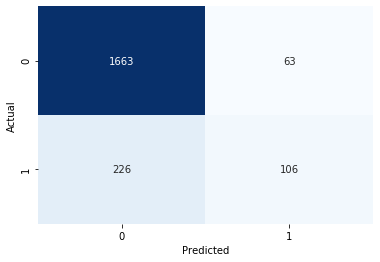

In [175]:
#visualising the confusion  matrix  on training data set: 
plot_confmat(y_train,y_trn_prdct)

###### Although the Sensitivity score seems to be high , the model suffers with low Specificity ..... indicating more pruning is required on hyper parameters

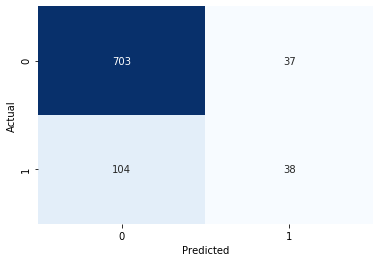

In [176]:
#Visualising the confusion matrix on testing data set:
plot_confmat(y_test,y_tst_prdct)

#Anticipated result since the model was had low specificity on training data set :

###### Second Trial with tuning of hyper parameters : ciriterion ='entropy', increasing max_depth and min_samples_split

In [177]:
BaseModel.set_params(criterion='gini',max_depth=8,min_samples_split=10,random_state=40)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [178]:
#Training the new model,scoring prediction on test and train data set , 
BaseModel.fit(x_train,y_train)
y_tst_prdct = BaseModel.predict(x_test)
y_trn_prdct = BaseModel.predict(x_train)
result = _accrcy(y_train,y_test,y_trn_prdct,y_tst_prdct)
for k,v in result.items():
    print("{} Accuracy Score {}".format(k,v))

Training Accuracy Score 0.9139941690962099
Testing Accuracy Score 0.8809523809523809


###### Observation: There is an increase in testing accuracy about 5% and training accuracy around 2% with new Hyper parameters 

###### Sensitivity,Specificity and AUC visualisation:

In [179]:
# Cross validation of model scores 
kfold_result = cross_val_score(BaseModel,x_encd,y_encd,cv=10,scoring='accuracy')
print("The average accuracy score of the k-fold cross validation ",np.mean(kfold_result))

The average accuracy score of the k-fold cross validation  0.8908163265306122


###### Increase in cross validation average score compared

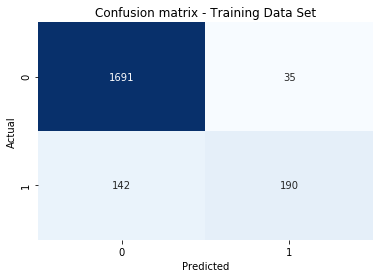

In [180]:
#Visualising confusion matrix of training data set:
plot_confmat(y_train,y_trn_prdct)
plt.title("Confusion matrix - Training Data Set")
plt.show()


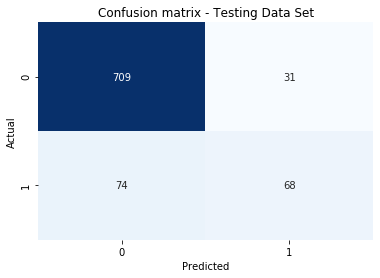

In [181]:
plot_confmat(y_test,y_tst_prdct)
plt.title("Confusion matrix - Testing Data Set")
plt.show()

##### Specificity keeps decreasing : 

###### Visualising AUC curve : 

In [182]:
fpr_dt,tpr_dt,_ = roc_curve(y_test,y_tst_prdct)
roc_auc_dt = auc(fpr_dt,tpr_dt)

In [183]:
def plt_auc(datax,prdct_data):
    fpr_dt,tpr_dt,_ = roc_curve(datax,prdct_data)
    roc_auc_dt = auc(fpr_dt,tpr_dt)
    plt.figure(1)
    lw = 1
    plt.plot(fpr_dt,tpr_dt,color='green',lw=lw,label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
    plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle="--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right')
    plt.show()

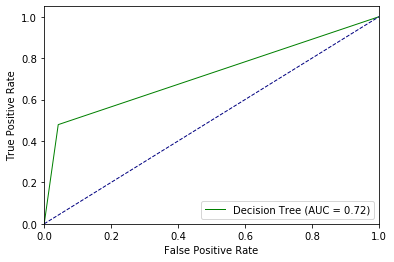

In [184]:
plt_auc(y_test,y_tst_prdct)

###### Low AUC score as expected 

##### Using GridSearchCV to identify optimised values for Hyper Parameters to improve the model

In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
# Parameters dictionary 
param_dict ={'criterion':['gini','entropy'],
              'max_depth':[4,6,8,10,12,14,13,15,16,18,20,21,22],
              'min_samples_split':list(range(2,12)),
              'max_features':['auto','sqrt','log2',None]
             }

In [162]:
#Grid Search CV implentation  with param_dict
cv_tree = GridSearchCV(BaseModel,cv=5,param_grid=param_dict,n_jobs=-1,scoring='accuracy')
cv_tree.fit(x_train,y_train)
print(cv_tree.best_params_)

{'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'min_samples_split': 2}


In [187]:
#Updating BaseModel with GridSearchCV results 
BaseModel.set_params(criterion='gini', max_depth=16, max_features='auto', min_samples_split=2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [188]:
#Training the new model,scoring prediction on test and train data set , 
BaseModel.fit(x_train,y_train)
y_tst_prdct = BaseModel.predict(x_test)
y_trn_prdct = BaseModel.predict(x_train)
result = _accrcy(y_train,y_test,y_trn_prdct,y_tst_prdct)
for k,v in result.items():
    print("{} Accuracy Score {}".format(k,v))

Training Accuracy Score 1.0
Testing Accuracy Score 0.9160997732426304


###### Running into Over fitting issues 

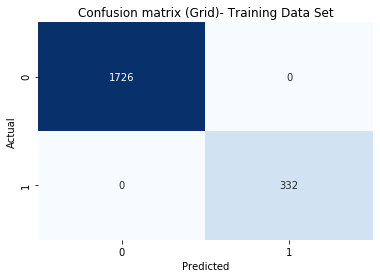

In [189]:
#Plotting confusion matrix: 
plot_confmat(y_train,y_trn_prdct)
plt.title("Confusion matrix (Grid)- Training Data Set")
plt.show()

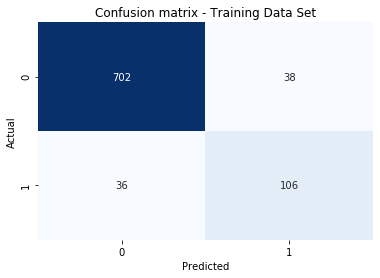

In [190]:
plot_confmat(y_test,y_tst_prdct)
plt.title("Confusion matrix - Training Data Set")
plt.show()

###### Re - Run Grid search with increase in kfolds to 10

In [191]:
param_dict2 ={'criterion':['gini','entropy'],
              'max_depth':[4,6,8,10,12,14,13,15,16,18,20,21,22],
              'min_samples_split':list(range(4,12)),
              'max_features':['auto','sqrt','log2',None]
             }

In [192]:
# Iteration 2 - Grid Search CV implentation  with param_dict2
cv_tree = GridSearchCV(BaseModel,cv=10,param_grid=param_dict,n_jobs=-1,scoring='accuracy')
cv_tree.fit(x_train,y_train)
print(cv_tree.best_params_)

{'criterion': 'entropy', 'max_depth': 18, 'max_features': None, 'min_samples_split': 2}


In [201]:
BaseModel.set_params(criterion='entropy',max_depth=18,min_samples_split=4)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=18, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [202]:
BaseModel.fit(x_train,y_train)
y_tst_prdct = BaseModel.predict(x_test)
y_trn_prdct = BaseModel.predict(x_train)
result = _accrcy(y_train,y_test,y_trn_prdct,y_tst_prdct)
for k,v in result.items():
    print("{} Accuracy Score {}".format(k,v))

Training Accuracy Score 0.988824101068999
Testing Accuracy Score 0.9217687074829932


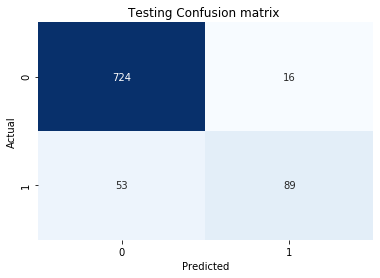

In [203]:
# plotting confusion matrix 
plot_confmat(y_test,y_tst_prdct)
plt.title("Testing Confusion matrix ")
plt.show()

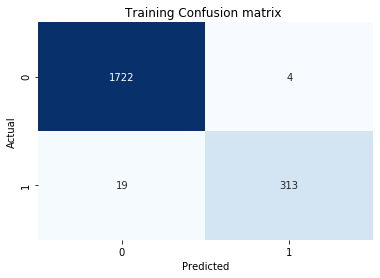

In [204]:
plot_confmat(y_train,y_trn_prdct)
plt.title("Training Confusion matrix ")
plt.show()

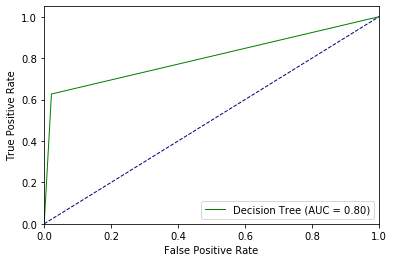

In [205]:
# Area under the curve :
plt_auc(y_test,y_tst_prdct)

###### Reasoable increase in AUC score up by 8%

###### observation :  Grid search params gives very close hyper parameters estimation

{'criterion': 'entropy', 'max_depth': 18, 'max_features': None, 'min_samples_split': 2 }
    give an accuracy very close to 100% 

{'criterion': 'entropy', 'max_depth': 18, 'max_features': None, 'min_samples_split': 4 }
    reduces the accuarcy 0.98 on training and 0.92 on testing which is okay 
    
 

In [206]:
#Cross validation of New Hyper Meters
kfold_result = cross_val_score(BaseModel,x_encd,y_encd,cv=10,scoring='accuracy')
print("The average accuracy score of the k-fold cross validation ",np.mean(kfold_result)) 

The average accuracy score of the k-fold cross validation  0.9663265306122449


#### The Average Score of Cross validation is very close to what we got from training, Freezing this model as selected Decision Tree Classifier                        With Hyper Parameters - > "Criterion":  Entropy, max_depth:18, min_samples_split:4 

### RandomForestClassifier : Model evaluation 

In [220]:
#Loading Random Forest Classifier 

rBaseModel = RandomForestClassifier(random_state=0)

In [221]:
rBaseModel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [222]:
y_tst_prdct = rBaseModel.predict(x_test)
y_trn_prdct = rBaseModel.predict(x_train)
result = _accrcy(y_train,y_test,y_trn_prdct,y_tst_prdct)
for k,v in result.items():
    print("{} Accuracy Score {}".format(k,v))

Training Accuracy Score 1.0
Testing Accuracy Score 0.9455782312925171


###### Intially classifier with default Hyper Parameters indicate the problem of overfitting

In [223]:
## Cros Validation score :
rKfold_rslt = cross_val_score(rBaseModel,x_encd,y_encd,cv=10)
print(np.mean(rKfold_rslt))

1.0


###### Model Does have over fitting issue, Tuning Hyper Parameters manually

In [225]:
#Setting Hyper Parameters 
rParam_dict = {'max_depth':[2,4,6,8,10,12,14],'min_samples_split':[2,4,6,8,9,10],'max_features':['auto','sqrt','log2',None]
               ,'criterion':['gini','entropy'],'bootstrap':[True,False]}

In [227]:
np.random.seed(0)

rGrid = GridSearchCV(rBaseModel,cv=10,param_grid=rParam_dict,n_jobs=-1)
rGrid.fit(x_train,y_train)
print(rGrid.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'log2', 'min_samples_split': 2}


###### OutPut OF GridSearchCV: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'log2', 'min_samples_split': 2} these hypermeters tend to over fit training sets, setting the hyper parameters manually

In [251]:
rBaseModel.set_params(bootstrap=True,criterion='gini',max_depth=14,max_features='auto',min_samples_split=4,
                     oob_score=True,random_state=40,n_estimators=200)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=40, verbose=0,
                       warm_start=False)

In [252]:
rBaseModel.fit(x_train,y_train)
y_tst_prdct = rBaseModel.predict(x_test)
y_trn_prdct = rBaseModel.predict(x_train)
result = _accrcy(y_train,y_test,y_trn_prdct,y_tst_prdct)
for k,v in result.items():
    print("{} Accuracy Score {}".format(k,v))

Training Accuracy Score 0.9980563654033042
Testing Accuracy Score 0.9455782312925171


In [253]:
Kfold_test = cross_val_score(rBaseModel,x_encd,y_encd,cv=10)
print("Kfold Average accuracy score",np.mean(Kfold_test))

Kfold Average accuracy score 0.9897959183673468


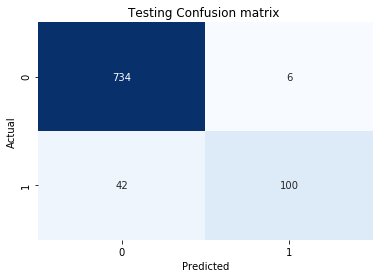

In [265]:
plot_confmat(y_test,y_tst_prdct)
plt.title("Testing Confusion matrix ")
plt.show()

In [270]:
#Error Rate
test_error_rate = 1 - result['Testing']
print("Mean Error rate on test set",test_error_rate)

Mean Error rate on test set 0.05442176870748294


###### Area under curve (AUC)

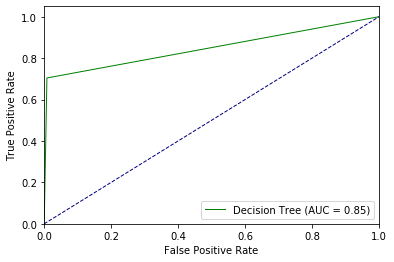

In [271]:
plt_auc(y_test,y_tst_prdct)

###### AUC Score looks good ...at 0.85

###### Freezing rBaseModel with Hyper parameters:
                    (bootstrap=True,criterion='gini',max_depth=14,max_features='auto',min_samples_split=4,
                     oob_score=True,random_state=40,n_estimators=200)